In [1]:
import pandas as pd

df = pd.read_csv(
     filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
     header=None,
     sep = ',')
        
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) #drops emplty lines at the file end

df.tail()


,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
#Split the data table into X and class as Y
X = df.ix[:,0:4].values
y = df.ix[:,4].values

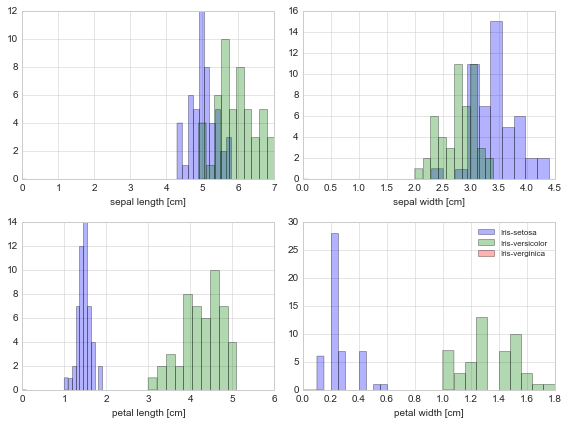

In [3]:
#Explore Data through visualization
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

label_dict = {1: 'Iris-Setosa', 
              2: 'Iris-Versicolor',
              3: 'Iris-Verginica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        plt.subplot(2,2,cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-verginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha = 0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) # Standardize the data (with mean = 0 and variance =1) for optimal performance

In [5]:
#1. Eigencomposition
#equivalently we couldn use numpy to calculate cov matrix
print('Numpy Cov matrix: \n%s' %np.cov(X_std.T))

Numpy Cov matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [6]:
mean_vec = np.mean(X_std, axis=0)
print mean_vec
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

[ -4.73695157e-16  -6.63173220e-16   3.31586610e-16  -2.84217094e-16]
Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [8]:
#Sometime corelation matrix is used than covariance matrix
cor_mat1 = np.corrcoef(X_std.T)
eig_val, eig_vec = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [9]:
#Sometime corelation matrix is used than covariance matrix
cor_mat1 = np.corrcoef(X.T)
eig_val, eig_vec = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [10]:
#Singular vector composition for more computational performance
u,s,v = np.linalg.svd(X_std.T)

In [11]:
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [12]:
#2. Selecting PCA - 
#Eigenvector only provides directions of projections of new dimensions but ita length is all unit value (1.0)

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print ('Everything is okay!!')

Everything is okay!!


In [16]:
#Eigenvector with least eigenvalues carries least information about data hence they can be dropped
#Make the list of eigenvector and corresponding eigenvalues 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
#visually confirm that the list is correctly sorted
print ("Eigenvalues in descending order")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [17]:
#Explained Variance - How many eigenvalues we should choose as new dimensions of our data, Explained variance tell us about how much variance in data 
# can be explained by the new feature spaces of eigenvectors.

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

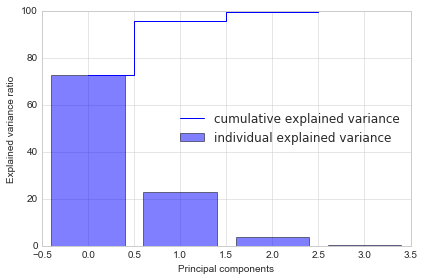

In [19]:
#It is clear that together first two PCA makes up more than 95% variability in the data and rest of the PCA explains very less, hence they can be dropped safely.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
#Projection matrix - Matrix created by selected PCAs, here we are reducing 3 d feature space into 2-d feature space using PCAs.
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print ("Matrix W:\n", matrix_w)

('Matrix W:\n', array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]]))


In [21]:
#3. Projection on the new feature space

#Now matrix_w should be used to transform original feature space

Z = X_std.dot(matrix_w)

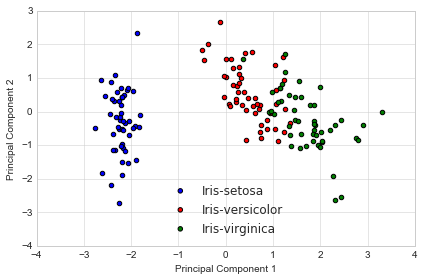

In [23]:
#Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case),
#where the samples are “most spread” along the new feature axes.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Z[y==lab, 0],
                    Z[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
#Shortcut using Scikit learn
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Z_sklearn = sklearn_pca.fit_transform(X_std)

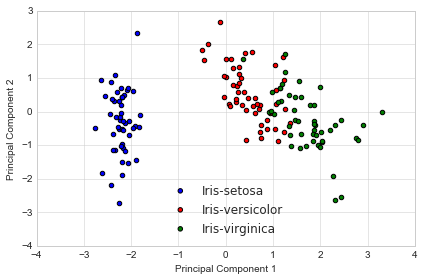

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Z_sklearn[y==lab, 0],
                    Z_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()